In [1]:
import numpy as np
import matplotlib.pyplot as plt

import mdtraj as md
from openmm.app.topology import Topology
from openmm.app.simulation import Simulation
from openmm.app.dcdreporter import DCDReporter
from openmm.app.statedatareporter import StateDataReporter
import openmm.unit as u
import openmm as mm
import openmm.openmm as openmm
import pyemma.coordinates as coor
import pyemma

In [2]:

! type pdb_file_4AKE_Calpha.pdb
! type pdb_file_1AKE_Calpha.pdb

# We load the trajectory and the pdb file with the initial configuration
traj_AKE4 = md.load('traj_AKE4.xtc',top='pdb_file_4AKE_Calpha.pdb')


MODEL        0
ATOM      2  CA  MET A   1      -9.901 -24.422 -10.479  1.00  0.00           C  
ATOM     10  CA  ARG A   2      -7.028 -22.352  -9.051  1.00  0.00           C  
ATOM     21  CA  ILE A   3      -5.227 -20.106 -11.463  1.00  0.00           C  
ATOM     29  CA  ILE A   4      -2.477 -17.496 -11.033  1.00  0.00           C  
ATOM     37  CA  LEU A   5      -2.565 -14.983 -13.957  1.00  0.00           C  
ATOM     45  CA  LEU A   6       0.768 -13.265 -14.734  1.00  0.00           C  
ATOM     53  CA  GLY A   7       1.394 -10.431 -17.162  1.00  0.00           C  
ATOM     57  CA  ALA A   8       3.395  -7.286 -17.735  1.00  0.00           C  
ATOM     62  CA  PRO A   9       1.751  -3.951 -17.001  1.00  0.00           C  
ATOM     69  CA  GLY A  10       0.015  -2.928 -20.242  1.00  0.00           C  
ATOM     73  CA  ALA A  11      -0.245  -6.408 -21.794  1.00  0.00           C  
ATOM     78  CA  GLY A  12      -3.997  -6.640 -21.064  1.00  0.00           C  
ATOM     82  

MODEL        0
ATOM      2  CA  MET A   1      26.091  52.849  39.889  1.00  0.00           C  
ATOM     10  CA  ARG A   2      27.437  49.969  37.786  1.00  0.00           C  
ATOM     21  CA  ILE A   3      24.961  47.988  35.671  1.00  0.00           C  
ATOM     29  CA  ILE A   4      25.194  44.925  33.360  1.00  0.00           C  
ATOM     37  CA  LEU A   5      22.428  44.503  30.712  1.00  0.00           C  
ATOM     45  CA  LEU A   6      21.933  40.811  29.752  1.00  0.00           C  
ATOM     53  CA  GLY A   7      19.604  39.512  26.973  1.00  0.00           C  
ATOM     57  CA  ALA A   8      19.324  37.742  23.567  1.00  0.00           C  
ATOM     62  CA  PRO A   9      20.108  39.651  20.294  1.00  0.00           C  
ATOM     69  CA  GLY A  10      17.487  42.426  19.756  1.00  0.00           C  
ATOM     73  CA  ALA A  11      15.960  42.201  23.284  1.00  0.00           C  
ATOM     78  CA  GLY A  12      16.082  46.035  23.547  1.00  0.00           C  
ATOM     82  

In [3]:
last_frame = traj_AKE4[-1]
output_file = 'last_frame_data.pdb'
last_frame.save(output_file)
!type {output_file}

REMARK   1 CREATED WITH MDTraj 1.9.9, 2024-02-20
CRYST1   20.000   20.000   20.000  90.00  90.00  90.00 P 1           1 
MODEL        0
ATOM      2  CA  MET A   1      12.710 -13.050 -19.450  1.00  0.00           C  
ATOM     10  CA  ARG A   2       9.330 -14.350 -18.210  1.00  0.00           C  
ATOM     21  CA  ILE A   3       8.060 -12.720 -15.080  1.00  0.00           C  
ATOM     29  CA  ILE A   4       4.720 -13.790 -13.670  1.00  0.00           C  
ATOM     37  CA  LEU A   5       3.310 -11.050 -11.290  1.00  0.00           C  
ATOM     45  CA  LEU A   6       0.560 -12.220  -8.720  1.00  0.00           C  
ATOM     53  CA  GLY A   7      -1.290 -10.120  -6.220  1.00  0.00           C  
ATOM     57  CA  ALA A   8      -4.780  -9.420  -4.920  1.00  0.00           C  
ATOM     62  CA  PRO A   9      -7.250  -7.390  -6.960  1.00  0.00           C  
ATOM     69  CA  GLY A  10      -6.450  -3.750  -6.030  1.00  0.00           C  
ATOM     73  CA  ALA A  11      -3.230  -4.720  -4.200

## 1) Domains

Now we want to distinguish between the different domains: 

Residues 30–59 to the NMP domain
Residues 122–159 to the LID domain 
Residues 1–29, 60–121 and 160–214 to the CORE domain

Residues 113–122 make up the distal LID-CORE hinge
Residues 29–31 the distal NMP-CORE hinge
Residues 160–169 the proximal LID-CORE hinge region 
Residues 55–58 the proximal NMPCOREhinge.


In [4]:
NMP_indices = (30, 59)
LID_indices = (122, 159)
CORE_indices = list(range(1, 30)) + list(range(60, 122)) + list(range(160, 214))

traj_AKE4 = md.load('traj_AKE4.xtc', top='pdb_file_4AKE_Calpha.pdb')

NMP_residues_traj_AKE4 = traj_AKE4.atom_slice(range(NMP_indices[0]-1, NMP_indices[1]))
NMP_residues_traj_AKE4.save_xtc('traj_AKE4_NMP.xtc')

LID_residues_traj_AKE4 = traj_AKE4.atom_slice(range(LID_indices[0]-1, LID_indices[1]))
LID_residues_traj_AKE4.save_xtc('traj_AKE4_LID.xtc')

CORE_residues_traj_AKE4 = traj_AKE4.atom_slice(CORE_indices)
CORE_residues_traj_AKE4.save_xtc('traj_AKE4_CORE.xtc')


In [5]:
# We now calculate the center of mass of each domain for every step in the trajectory

center_of_mass_array_NMP = md.compute_center_of_mass(NMP_residues_traj_AKE4)
center_of_mass_array_LID = md.compute_center_of_mass(LID_residues_traj_AKE4)
center_of_mass_array_CORE = md.compute_center_of_mass(CORE_residues_traj_AKE4)



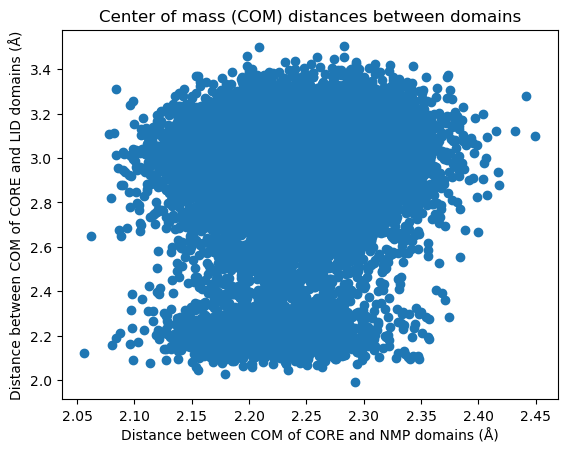

In [6]:
distance_CORE_NMP=np.linalg.norm(center_of_mass_array_NMP - center_of_mass_array_CORE, axis=1)
distance_CORE_LID=np.linalg.norm(center_of_mass_array_LID - center_of_mass_array_CORE, axis=1)

plt.scatter(distance_CORE_NMP, distance_CORE_LID)

plt.title('Center of mass (COM) distances between domains')
plt.xlabel('Distance between COM of CORE and NMP domains (Å)')
plt.ylabel('Distance between COM of CORE and LID domains (Å)')

# Show the plot
plt.show()

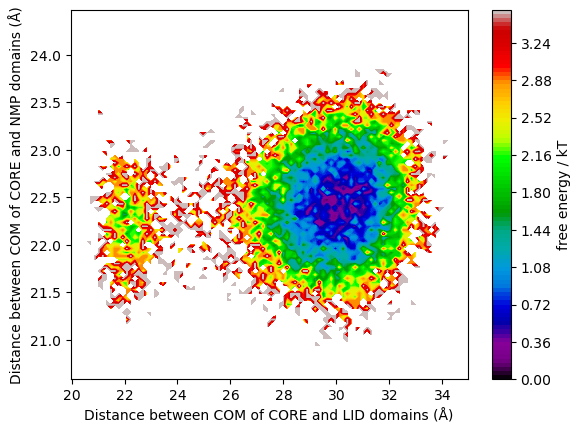

In [22]:

pyemma.plots.plot_free_energy(distance_CORE_LID*10, distance_CORE_NMP*10)

plt.xlabel('Distance between COM of CORE and LID domains (Å)')
plt.ylabel('Distance between COM of CORE and NMP domains (Å)')

plt.show()
